In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset linear regression multiple
Dans notre Projet nous avons fait le choix de générer un DataSet avec l'importation de la fonction #make_regression qui va nous générer le dataset que nous désirons (avec la forme que je voulons mettre en pratique dans notre implémentation, c'est à dire un DataSet Lineaire à plusieurs dimensions à l'occurence 2 dans notre cas de figure) de manière alératoire 

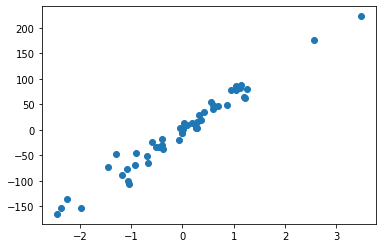

In [8]:
x, y = make_regression(n_samples=50, n_features=2, noise=10) 
#y = y + abs(y/2)

plt.scatter(x[:,0], y)


In [9]:
#Vérification des Dimensions
print(x.shape)
print(y.shape)

#Redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(50, 2)
(50,)
(50, 1)


In [10]:
# Creation de notre matrice X, biais inclut
X = np.hstack((x, np.ones((x.shape[0], 1)))) # concerne la matrice avec  deux features
print(X.shape)
print(X[:10])


(50, 3)
[[-0.517267   -0.62909766  1.        ]
 [ 0.6011114  -0.05708617  1.        ]
 [-1.18105399 -0.23200889  1.        ]
 [ 1.22384493 -2.05100798  1.        ]
 [-1.44766227  1.84371353  1.        ]
 [-2.4497146   0.43907259  1.        ]
 [ 0.33011487 -0.0604333   1.        ]
 [ 0.2819871   0.94247735  1.        ]
 [-0.4568572  -0.41146164  1.        ]
 [-0.40532935 -0.80366077  1.        ]]


In [11]:
#Initialisation du vecteur theta
theta = np.random.randn(3, 1)
theta

array([[-0.60763476],
       [ 0.3856907 ],
       [ 0.87971489]])

# 2. Modele Linéaire

le Modèle n'est tout autre que la fonction d'une droite

F(x) = ax1 + bx2 + c

On implemente un Modèle   F = X.Ө   et on teste s'il n'y a pas de bug sur notre Modèle. De plus, cela permet de voir à quoi ressemble le Modèle initial, défini par la valeur de Ө

X  ici est la matrice contenant tous les éléments features x1 et x2 de notre dataSet ainsi que notre colonne de biais remplit de 1. Ce qui nous donne exactement une matrice de deux colonnes de features x1 et x2 et une colonne de biais remplit de 1

Ө  quant à lui n'est tout autre que le vecteur parametre contenant nos parametre a, b et c

In [12]:
def model(X, theta):
    return X.dot(theta)

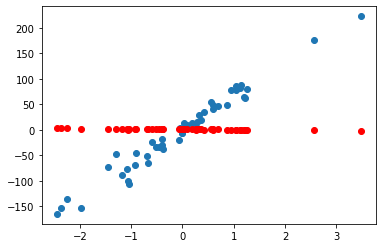

In [13]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c="r")

# 3. Fonction coût : Erreur quadratique Moyenne
On mesure les erreurs du modele sur le DataSet X,y en implementant l'erreur quadratique moyenne


j(a,b,c) =  1/2m  Σ(ax +  b  –  y)²


j(a,b,c) =  1/2m  Σ(F(x)  –  y)²

Forme matricielle de notre fonction coût qui est aussi l'erreur quadratique moyenne

j(Ө) = 1/2m Σ(X.Ө - y)²  

puis on fait le teste afin de vérifier s'il n'y a pas de bug


In [14]:
def  function_cost(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [15]:
function_cost(X, y, theta)

3059.301895584091

# 4. Gradients et Descente de Gradient

On implemente le formule de Gradient pour l'erreur quadratique moyenne

nous avions tout d'abord les fonctions étant à la bases les dérivées de la fonction coût par rapport aux parametres de notre modele


Əj(a,b,c)/Əa  = 1/m Σx(ax1  +  bx2  +  c  - y)  Gradient par rapport au paramètre a


Əj(a,b,c)/Əb  = 1/m Σx(ax1  +  bx2  +  c  - y)   Gradient par rapport au paramètre b


Əj(a,b,c)/Əb  = 1/m Σ(ax1  +  bx2  +   c  - y)   Gradient par rapport au paramètre c


puis nous rangeons ce qui précède dans les matrices et vecteurs auxquels ils correspondent et nous obtenons ceci:


Əj(Ө)/ƏӨ = 1/m X.T(X.Ө  -  y)

Ensuite, on utilise cette fonction dans la descente de Gradient

Ө = Ө - α(Əj(Ө)/ƏӨ)

In [16]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [17]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # Creation d'un tableau de stockage pour enregistrer l'evolution du coût du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) #Mise à jour du parametre theta(formule du gradient descent)
        cost_history[i] = function_cost(X, y, theta) #On enregistre le valeur du coût i dans cost_histor[i]
        
    return theta, cost_history

# 5. Learning 
On defini le nombre d'ITERATIONS que nous souhaitond effectuer ainsi que la valeur de notre learning rate, le PAS d'apprentissage α et on peut par la suite commencer l'entrainement de notre algorithme

Une fois le modele entrainé, on observe les resultats par rapport à notre dataSet

In [18]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000 )

In [19]:
theta_final # Les parametres du modele une fois que la machine a été entrainée

array([[68.78647908],
       [12.23323963],
       [-0.40558877]])

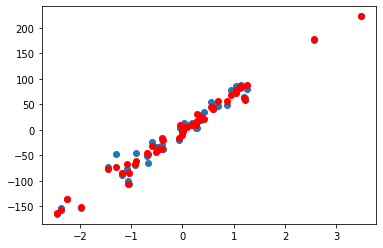

In [20]:
#Creation d'un vecteur predictions qui contient les predictions de notre modele finale 
predictions = model(X, theta_final)

#affichage de predictions en rouge par rapport à notre dataset
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c="r")

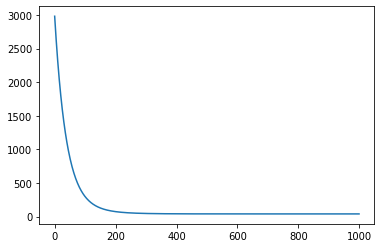

In [21]:
plt.plot(range(1000), cost_history)

# 6. Notre coeficient de détermination
Evaluation de la performance finale de notre modele

In [22]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [23]:
coef_determination(y, predictions)

0.9864901144471027

# 7. Visualisation en 3D de notre 


<IPython.core.display.Javascript object>


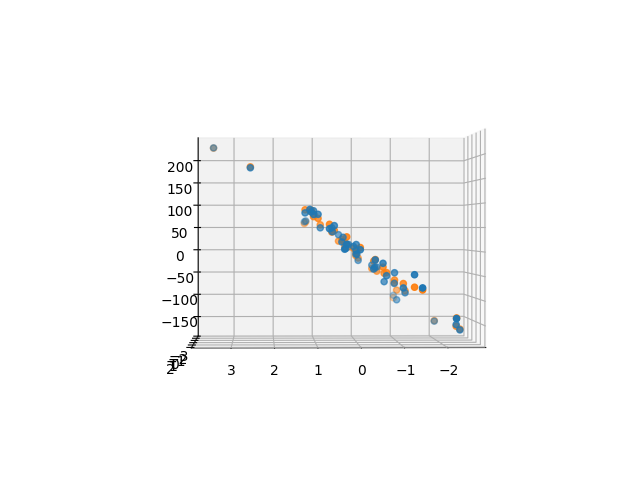

In [24]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)